# TME6: Approches interprétables "par design"

- LE LORIER Yann
- NGUYEN Hoang-Son

## Exercice 1: Mesures de discrimination

### Question 1

In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd

In [2]:
def Shannon(p):
    # P correspond à une distribution de probabilité
    if p == 0 or p == 1:
        return float(0)
    return -p*math.log(p, 2) - (1-p)*math.log(1-p, 2)

def Gini(p):
    if p == 0:
        return float(0)
    return 1 - p**2 - (1-p)**2

def Ambiguite(p):
    if p == 0 or p == 1:
        return float(0)
    if p > 1-p:
        return ((1-p)/p)*math.log(2, 2)
    return (p/(1-p))*math.log(2, 2)


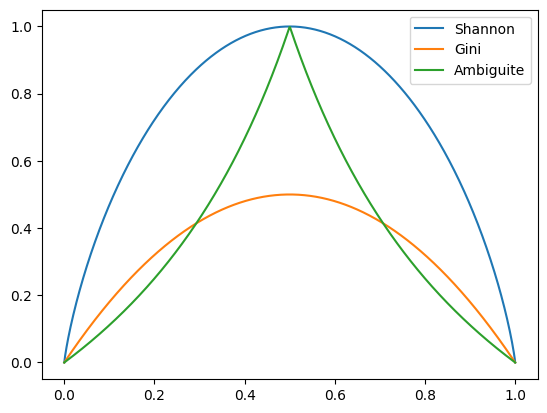

In [3]:
x=np.linspace(0,1,1000)
y=np.asarray([Shannon(i) for i in x])
plt.plot(x, y, label='Shannon')
y=np.asarray([Gini(i) for i in x])
plt.plot(x, y, label='Gini')
y=np.asarray([Ambiguite(i) for i in x])
plt.plot(x, y, label='Ambiguite')
plt.legend()
plt.show()

### Question 2

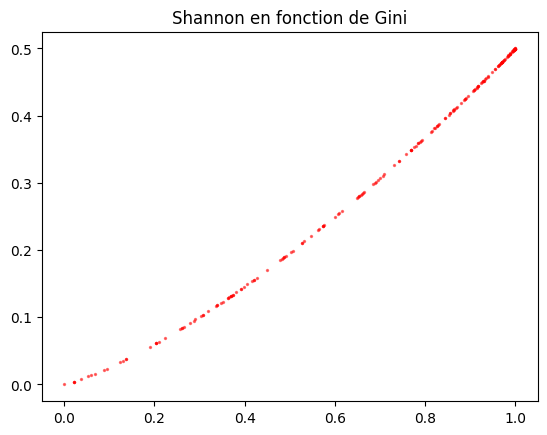

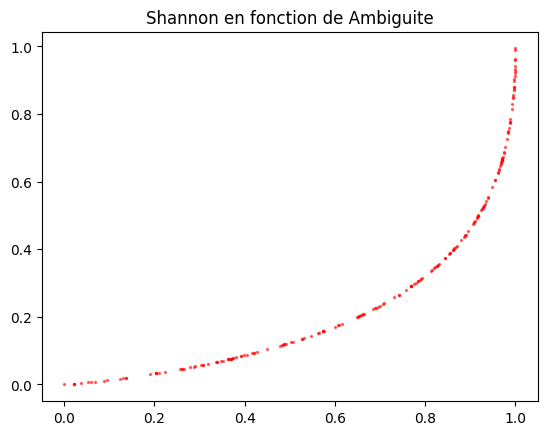

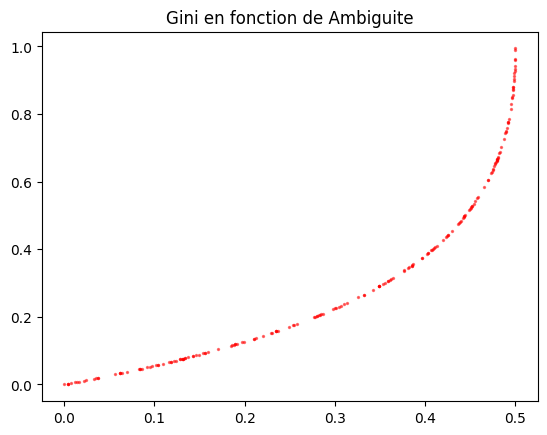

In [4]:
sample = np.random.choice(x, size = 200)
list_H = [Shannon, Gini, Ambiguite]
for i in range(len(list_H)-1):
    for j in range(i+1, len(list_H)):
        f_1 = list_H[i]
        f_2 = list_H[j]
        H1 = []
        H2 = []
        for p in sample:
            H1.append(f_1(p))
            H2.append(f_2(p))
        plt.scatter(H1, H2, s=2, c='red', alpha=0.5)
        plt.title(f"{f_1.__name__} en fonction de {f_2.__name__}")
        plt.show()

### Question 3 - Commentaires sur les mesures

En fonction des mesures prises en considération, nous pouvons observer, dans le cas de la classification binaire, que les points suivent une courbe que peut être assimilée à une courbe quadratique ou bien une courbe linéaire. Si la courbe est strictement croissante, nous pouvons conclure que si nous prenons deux mesures $H_1$ et $H_2$, et une probabilité $p_1$ et $p_2$, nous avons:

$$
\text{Si } H_1(p_1) > H_1(p_2) \Rightarrow H_2(p_1) > H_2(p_2)
$$

Ceci veut dire que l'ordre des attributs est conservé et que nous pouvons donc utiliser n'importe quelle mesure, puisqu'on connaît la relation entre $H_1$ et $H_2$

## Exercice 2

### Question 1

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.datasets import load_digits
base_digits = load_digits()
print("Descriptions de la base digits:\n", base_digits.data)

Descriptions de la base digits:
 [[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [7]:
X_train, X_test, y_train, y_test = train_test_split(base_digits.data, base_digits.target, test_size=0.2)

In [8]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
mon_arbre = DecisionTreeClassifier(criterion="entropy")
mon_arbre.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [9]:
mon_arbre.score(X_test, y_test)

0.8722222222222222

### Question 2

In [10]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split

In [11]:
elections_df = pd.read_csv('data/elections.csv')
elections_df.columns

Index(['Adresse', 'Majeur?', 'Nationalite', 'Label'], dtype='object')

Encodage One-Hot avec `pandas.get_dummies`

In [12]:
elections_df_oh = pd.get_dummies(elections_df, columns=['Adresse', 'Majeur?', 'Nationalite'], drop_first=True)
elections_df_oh.head()

,Label,Adresse_Paris,Adresse_Strasbourg,Majeur?_oui,Nationalite_Italien,Nationalite_Suisse
0,1,1,0,1,0,0
1,-1,1,0,0,0,0
2,1,0,0,1,1,0
3,-1,1,0,1,0,1
4,-1,0,1,0,1,0


In [13]:
X_train, X_test, y_train, y_test = train_test_split(elections_df_oh.drop('Label', axis=1), elections_df_oh['Label'], test_size=0.2)
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [14]:
clf.score(X_test, y_test)

1.0

### Question 3 et 4 - Construction d'un arbre

Construction d'un arbre avec ID3

Nous pouvons réaliser la construction de l'arbre avec un dataset d'entraînement. On attend alors un `pd.dataframe`.

In [15]:
df = pd.read_csv('data/weather.csv')

In [16]:
df

,Outlook,Temperature,Humidity,WindSpeed,Play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rainy,Mild,High,Weak,Yes
4,Rainy,Cool,Normal,Weak,Yes
5,Rainy,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rainy,Mild,Normal,Weak,Yes


In [32]:
import ipdb

On sépare le dataset en X et Y (labels):

In [201]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Play', axis=1), df['Play'], test_size=0.2)

In [208]:
import sys
import copy
class Node:
    def __init__(self, att_name):
        self.att_name = att_name
        self.children = None
        self.cl = None

    def is_leaf_node(self):
        return self.children is None

    def add_child(self, value, child):
        if self.children == None:
            self.children = dict()
        self.children[value] = child

    def add_leaf(self, cl):
        self.cl = cl
        self.children = None

    def classify(self, data, xai=False, path=''):
        if self.is_leaf_node():
            return self.cl, path + self.cl
        if data[self.att_name] in self.children:
            if xai:
                path += self.att_name + f': {data[self.att_name]}' + '->'
            return self.children[data[self.att_name]].classify(data, xai, path)
        else:
            print("attribute not found. :(")


class MonArbre:
    def __init__(self):
        self.root = None #class Node
        self.epsilon = 0.01

    def majoring_class(self, Y):
        valeurs, nb_fois = np.unique(Y, return_counts=True)
        return valeurs[np.argmax(nb_fois)]

    def shannon(self, P):
        somme = 0
        k = len(P)
        if k == 1:
            return float(0)
        for p in P:
            if p > 0:
                somme += p*math.log(p, k)
        return -somme
    
    def entropy(self, data):
        val, nb = np.unique(data, return_counts=True)
        P = np.asarray([i/len(data) for i in nb])
        return self.shannon(P)

    def build_tree(self, data_x, data_y, epsilon, feat_names):
        (nb_lig, nb_col) = data_x.shape

        class_entropy = self.entropy(data_y)
    
        if (class_entropy <= epsilon) or (nb_lig <= 1):
            node = Node("Label")
            node.add_leaf(self.majoring_class(data_y))
        else:
            gain_max = sys.float_info.min
            i_best = -1
            Xbest_values = None
    

            for i in range(nb_col):  # parcourir les colonnes
    
                sum1 = 0
                sum2 = 0
                X_j = data_x.iloc[:, i]  # X_j
                X_j = list(set(X_j))
    
                for v_j_l in X_j:  # parcourir toutes les valeurs de v_j
                    x_contient_v_j_l = data_x[data_x.iloc[:, i] == v_j_l]
                    p_vjl = len(x_contient_v_j_l) / len(data_x)
    
                    label_ = data_y[data_x.iloc[:, i] == v_j_l]
                    sum2 = self.entropy(label_)
                    sum1 += p_vjl * -sum2
                H_S_Y_Xj = - sum1
                info = class_entropy - H_S_Y_Xj
                if info > gain_max:
                    gain_max = info
                    i_best = i
                    Xbest_valeurs = copy.deepcopy(X_j)
                    
            if len(feat_names) > 0:
                node = Node(feat_names[i_best])
            else:
                node = Node(i_best)
            for v in Xbest_valeurs:
                node.add_child(v, self.build_tree(data_x[data_x.iloc[:, i_best] == v], data_y[data_x.iloc[:, i_best] == v], epsilon, feat_names))
        return node
        
        
    def fit(self, data_x, data_y):
        """
        data_x: pd.dataframe
        data_y: labels
        """
        self.root = self.build_tree(data_x, data_y, self.epsilon, data_x.columns)
            
        
    def predict(self, data) -> str:
        """
        predicts one data point i.e. runs through the tree
        """
        return self.root.classify(data)
        
    def predict_xai(self, data):
        return self.root.classify(data, xai=True)

In [209]:
tree_xai = MonArbre()
tree_xai.fit(X_train, y_train)
X_test

,Outlook,Temperature,Humidity,WindSpeed
13,Rainy,Mild,High,Strong
0,Sunny,Hot,High,Weak
12,Overcast,Hot,Normal,Weak


In [212]:
predict = X_test.iloc[0]
tree_xai.predict_xai(predict)

('No', 'Outlook: Rainy->WindSpeed: Strong->No')

### Question 5 - Dataset Mushrooms

In [213]:
df_mushrooms = pd.read_csv('data/mushrooms-1124.csv')
X_train, X_test, y_train, y_test = train_test_split(df_mushrooms.drop('class', axis=1), df_mushrooms['class'], test_size=0.2)
tree_mushrooms = MonArbre()
tree_mushrooms.fit(X_train, y_train)
predict = X_test.iloc[0]

In [214]:
tree_mushrooms.predict_xai(predict)

('e', 'odor: n->spore-print-color: n->e')